# Draw maps for sce

In [1]:
import contextily as ctx
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

## Read files

In [2]:
# Import England LSAO Shape file (use 'zip://'' prefix for zip files)
filename = "zip://./Lower_layer_super_output_areas_(E+W)_2011_Boundaries_(Generalised_Clipped)_V2.zip"
lsoa_gdf = geopandas.read_file(filename, crs='EPSG:27700')
data = pd.read_csv('results.csv')

<Axes: >

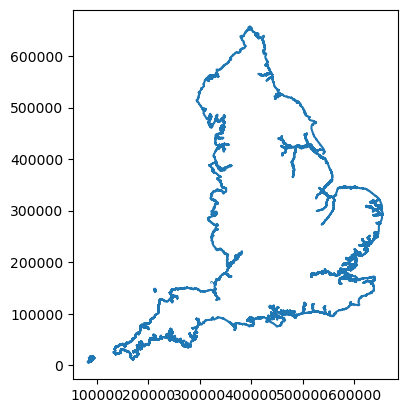

In [3]:
filename = "zip://./Countries_(December_2022)_GB_BFC.zip"
countries_gdf = geopandas.read_file(filename, crs='EPSG:27700')
mask = countries_gdf['CTRY22NM'] == 'England'
countries_gdf = countries_gdf[mask]
# Get outline of countries_gdf
england = countries_gdf.boundary
england.plot()


In [4]:
# Add net benefit column
prop_nlvo = 0.7
prop_lvo = 1 - prop_nlvo

# Utility

data['drip_ship_utility_shift'] = (
    (data['nlvo_drip_ship_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_drip_ship_ivt_mt_utility_shift'] * prop_lvo))

data['mothership_utility_shift'] = (
    (data['nlvo_mothership_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_mothership_ivt_mt_utility_shift'] * prop_lvo))

data['msu_utility_shift'] = (
    (data['nlvo_msu_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_msu_ivt_mt_utility_shift'] * prop_lvo))

data['msu_net_utility_benefit'] = data['msu_utility_shift'] - data['drip_ship_utility_shift']

# Get mRS 0-2 improvements
data['nlvo_drip_ship_ivt_improvement_over_no_treatment'] = \
    data['nlvo_drip_ship_ivt_mrs_0-2'] - data['nlvo_no_treatment_mrs_0-2']
data['nlvo_msu_ivt_improvement_over_no_treatment'] = \
    data['nlvo_msu_ivt_mrs_0-2'] - data['nlvo_no_treatment_mrs_0-2']
data['lvo_drip_ship_ivt_improvement_over_no_treatment'] = \
    data['lvo_drip_ship_ivt_mrs_0-2'] - data['lvo_no_treatment_mrs_0-2']
data['lvo_msu_ivt_improvement_over_no_treatment'] = \
    data['lvo_msu_ivt_mrs_0-2'] - data['lvo_no_treatment_mrs_0-2']


# Get proportions mRS 0-2 for each scenario
data['no_treatment_mrs_0-2'] = (
    (data['nlvo_no_treatment_mrs_0-2'] * prop_nlvo) +
    (data['lvo_no_treatment_mrs_0-2'] * prop_lvo))

data['drip_ship_mrs_0-2'] = (
    (data['nlvo_drip_ship_ivt_mrs_0-2'] * prop_nlvo) +
    (data['lvo_drip_ship_mt_mrs_0-2'] * prop_lvo))

data['drip_ship_mrs_0-2_improvement_over_no_treatment'] = \
    data['drip_ship_mrs_0-2'] - data['no_treatment_mrs_0-2']

data['mothership_mrs_0-2'] = (
    (data['nlvo_mothership_ivt_mrs_0-2'] * prop_nlvo) +
    (data['lvo_mothership_ivt_mt_mrs_0-2'] * prop_lvo))

data['mothership_mrs_0-2_improvement_over_no_treatment'] = \
    data['mothership_mrs_0-2'] - data['no_treatment_mrs_0-2']

data['msu_mrs_0-2'] = (
    (data['nlvo_msu_ivt_mrs_0-2'] * prop_nlvo) +
    (data['lvo_msu_ivt_mt_mrs_0-2'] * prop_lvo))

data['msu_mrs_0-2_improvement_over_no_treatment'] = \
    data['msu_mrs_0-2'] - data['no_treatment_mrs_0-2']


data['msu_mrs_0-2_benefit'] = data['msu_mrs_0-2'] - data['drip_ship_mrs_0-2']

data['nlvo_msu_ivt_utility_benefit'] = data['nlvo_msu_ivt_utility'] - data['nlvo_drip_ship_ivt_utility']
data['lvo_msu_ivt_utility_benefit'] = data['lvo_msu_ivt_utility'] - data['lvo_drip_ship_ivt_utility']
data['lvo_msu_ivt_mt_utility_benefit'] = data['lvo_msu_ivt_mt_utility'] - data['lvo_drip_ship_ivt_mt_utility']
data['nlvo_msu_ivt_mrs_0-2_benefit'] = data['nlvo_msu_ivt_mrs_0-2'] - data['nlvo_drip_ship_ivt_mrs_0-2']
data['lvo_msu_ivt_mrs_0-2_benefit'] = data['lvo_msu_ivt_mrs_0-2'] - data['lvo_drip_ship_ivt_mrs_0-2']
data['lvo_msu_ivt_mt_mrs_0-2_benefit'] = data['lvo_msu_ivt_mt_mrs_0-2'] - data['lvo_drip_ship_ivt_mt_mrs_0-2']

In [5]:
list(data)

['LSOA',
 'nearest_ivt_unit',
 'nearest_ivt_time',
 'nearest_mt_unit',
 'nearest_mt_time',
 'transfer_unit',
 'transfer_required',
 'transfer_time',
 'nearest_msu_unit',
 'nearest_msu_time',
 'Admissions',
 'England',
 'drip_ship_ivt_time',
 'drip_ship_mt_time',
 'nlvo_no_treatment_mrs_0-2',
 'nlvo_no_treatment_utility',
 'lvo_no_treatment_mrs_0-2',
 'lvo_no_treatment_utility',
 'nlvo_drip_ship_ivt_mrs_0-2',
 'nlvo_drip_ship_ivt_mrs_shift',
 'nlvo_drip_ship_ivt_utility',
 'nlvo_drip_ship_ivt_utility_shift',
 'lvo_drip_ship_ivt_mrs_0-2',
 'lvo_drip_ship_ivt_mrs_shift',
 'lvo_drip_ship_ivt_utility',
 'lvo_drip_ship_ivt_utility_shift',
 'lvo_drip_ship_mt_mrs_0-2',
 'lvo_drip_ship_mt_mrs_shift',
 'lvo_drip_ship_mt_utility',
 'lvo_drip_ship_mt_utility_shift',
 'lvo_drip_ship_ivt_mt_mrs_0-2',
 'lvo_drip_ship_ivt_mt_mrs_shift',
 'lvo_drip_ship_ivt_mt_utility',
 'lvo_drip_ship_ivt_mt_utility_shift',
 'mothership_ivt_time',
 'mothership_mt_time',
 'nlvo_mothership_ivt_mrs_0-2',
 'nlvo_mothershi

In [6]:
# Merge the data with the LSOA shapefile
data = lsoa_gdf.merge(data, left_on='LSOA11NM', right_on='LSOA', how='right')

In [7]:
hospitals_gdf = geopandas.read_file('stroke_hospitals.csv')
hospitals_gdf.geometry = geopandas.points_from_xy(
        hospitals_gdf.long, hospitals_gdf.lat)
# Set crs for geometry, using epsg4326 for lat/long
hospitals_gdf = hospitals_gdf.set_crs(epsg=4326)
# Convert to British National Grid
hospitals_gdf = hospitals_gdf.to_crs(epsg=27700)
hospitals_gdf.head()
mask = hospitals_gdf['Country'] == 'England'
hospitals_gdf = hospitals_gdf[mask]

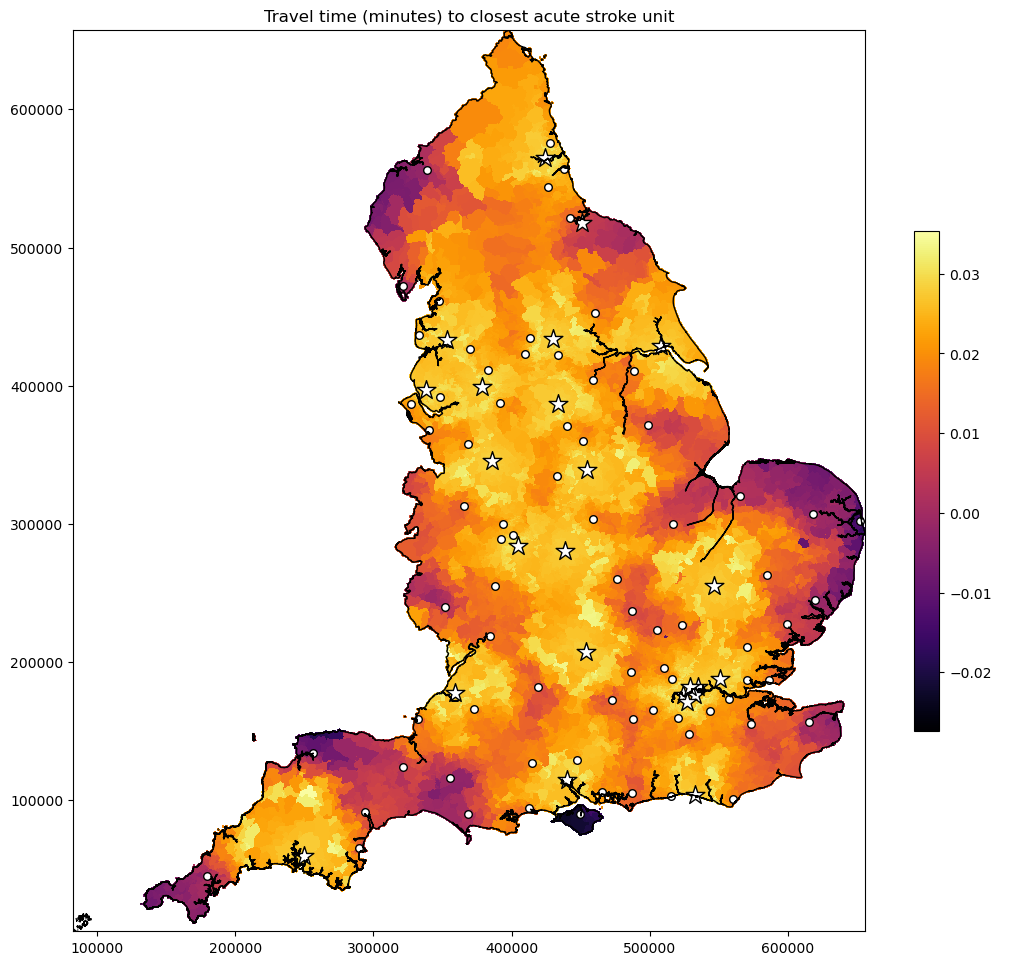

In [8]:
fig, ax = plt.subplots(figsize=(10, 10)) # Make max dimensions 10x10 inch
data.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column='msu_net_utility_benefit', # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 #vmin=0, # Manual scale min (remove to make automatic)
                 #vmax=0.05, # Manual scale max (remove to make automatic)
                 cmap='inferno', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':' '},
                 # Set to display legend
                 legend=True,
                 # Make slightly transparent
                 alpha=1)
#ax.set_axis_off() # Turn of axis linea dn numbers
# Plot outline
england.plot(ax=ax, edgecolor='k', facecolor='none', linewidth=1)

# Plot location of hospitals
mask = hospitals_gdf['Use_IVT'] == '1'
hospitals_gdf[mask].plot(ax=ax, edgecolor='k', facecolor='w', markersize=30, marker='o')
mask = hospitals_gdf['Use_MT'] == '1'
hospitals_gdf[mask].plot(ax=ax, edgecolor='k', facecolor='w', markersize=200, marker='*')
    
#ax.set_axis_off() # Turn of axis line numbers
ax.set_title('Travel time (minutes) to closest acute stroke unit')
# Adjust for printing
ax.margins(0)
ax.apply_aspect()
plt.subplots_adjust(left=0.01, right=1.0, bottom=0.0, top=1.0)

plt.savefig('map.jpg', dpi=300) # Save figure
plt.show()

In [9]:
list(hospitals_gdf)

['Postcode',
 'Hospital_name',
 'Use_IVT',
 'Use_MT',
 'Use_MSU',
 'Country',
 'Strategic Clinical Network',
 'Health Board / Trust',
 'Stroke Team',
 'SSNAP name',
 'Admissions 21/22',
 'Thrombolysis',
 'ivt_rate',
 'Easting',
 'Northing',
 'long',
 'lat',
 'Neuroscience',
 '30 England Thrombectomy Example',
 'hospital_city',
 'Notes',
 'geometry']

In [10]:
cols_to_plot = {
    'nlvo_drip_ship_ivt_improvement_over_no_treatment':'nLVO usual treatment\nadditional proportion mRS 0-2',
    'nlvo_msu_ivt_improvement_over_no_treatment':'nLVO MSU\nadditional proportion mRS 0-2',
    'nlvo_msu_ivt_mrs_0-2_benefit': 'nLVO MSU\nproportion mRS 0-2 benefit over usual care',
    'lvo_drip_ship_ivt_improvement_over_no_treatment':'LVO usual treatment\nadditional proportion mRS 0-2',
    'lvo_msu_ivt_improvement_over_no_treatment':'LVO MSU\nadditional proportion mRS 0-2',
    'lvo_msu_ivt_mrs_0-2_benefit': 'LVO MSU\nproportion mRS 0-2 benefit over usual care',
    'drip_ship_mrs_0-2_improvement_over_no_treatment': 'Combined nLVO/LVO usual treatment\nproportion mRS 0-2',
    'msu_mrs_0-2_improvement_over_no_treatment': 'Combined nLVO/LVO MSU\nadditional proportion mRS 0-2',
    'msu_mrs_0-2_benefit': 'Combined nLVO/LVO MSU\nproportion mRS 0-2 benefit over usual care',
}

colormaps = {
    'nlvo_drip_ship_ivt_improvement_over_no_treatment':'Greens',
    'nlvo_msu_ivt_improvement_over_no_treatment':'Oranges',
    'nlvo_msu_ivt_mrs_0-2_benefit': 'seismic_r',
    'lvo_drip_ship_ivt_improvement_over_no_treatment':'Greens',
    'lvo_msu_ivt_improvement_over_no_treatment':'Oranges',
    'lvo_msu_ivt_mrs_0-2_benefit': 'seismic_r',
    'drip_ship_mrs_0-2_improvement_over_no_treatment': 'Greens',
    'msu_mrs_0-2_improvement_over_no_treatment': 'Oranges',
    'msu_mrs_0-2_benefit': 'seismic_r',
}

list(cols_to_plot.keys())

['nlvo_drip_ship_ivt_improvement_over_no_treatment',
 'nlvo_msu_ivt_improvement_over_no_treatment',
 'nlvo_msu_ivt_mrs_0-2_benefit',
 'lvo_drip_ship_ivt_improvement_over_no_treatment',
 'lvo_msu_ivt_improvement_over_no_treatment',
 'lvo_msu_ivt_mrs_0-2_benefit',
 'drip_ship_mrs_0-2_improvement_over_no_treatment',
 'msu_mrs_0-2_improvement_over_no_treatment',
 'msu_mrs_0-2_benefit']

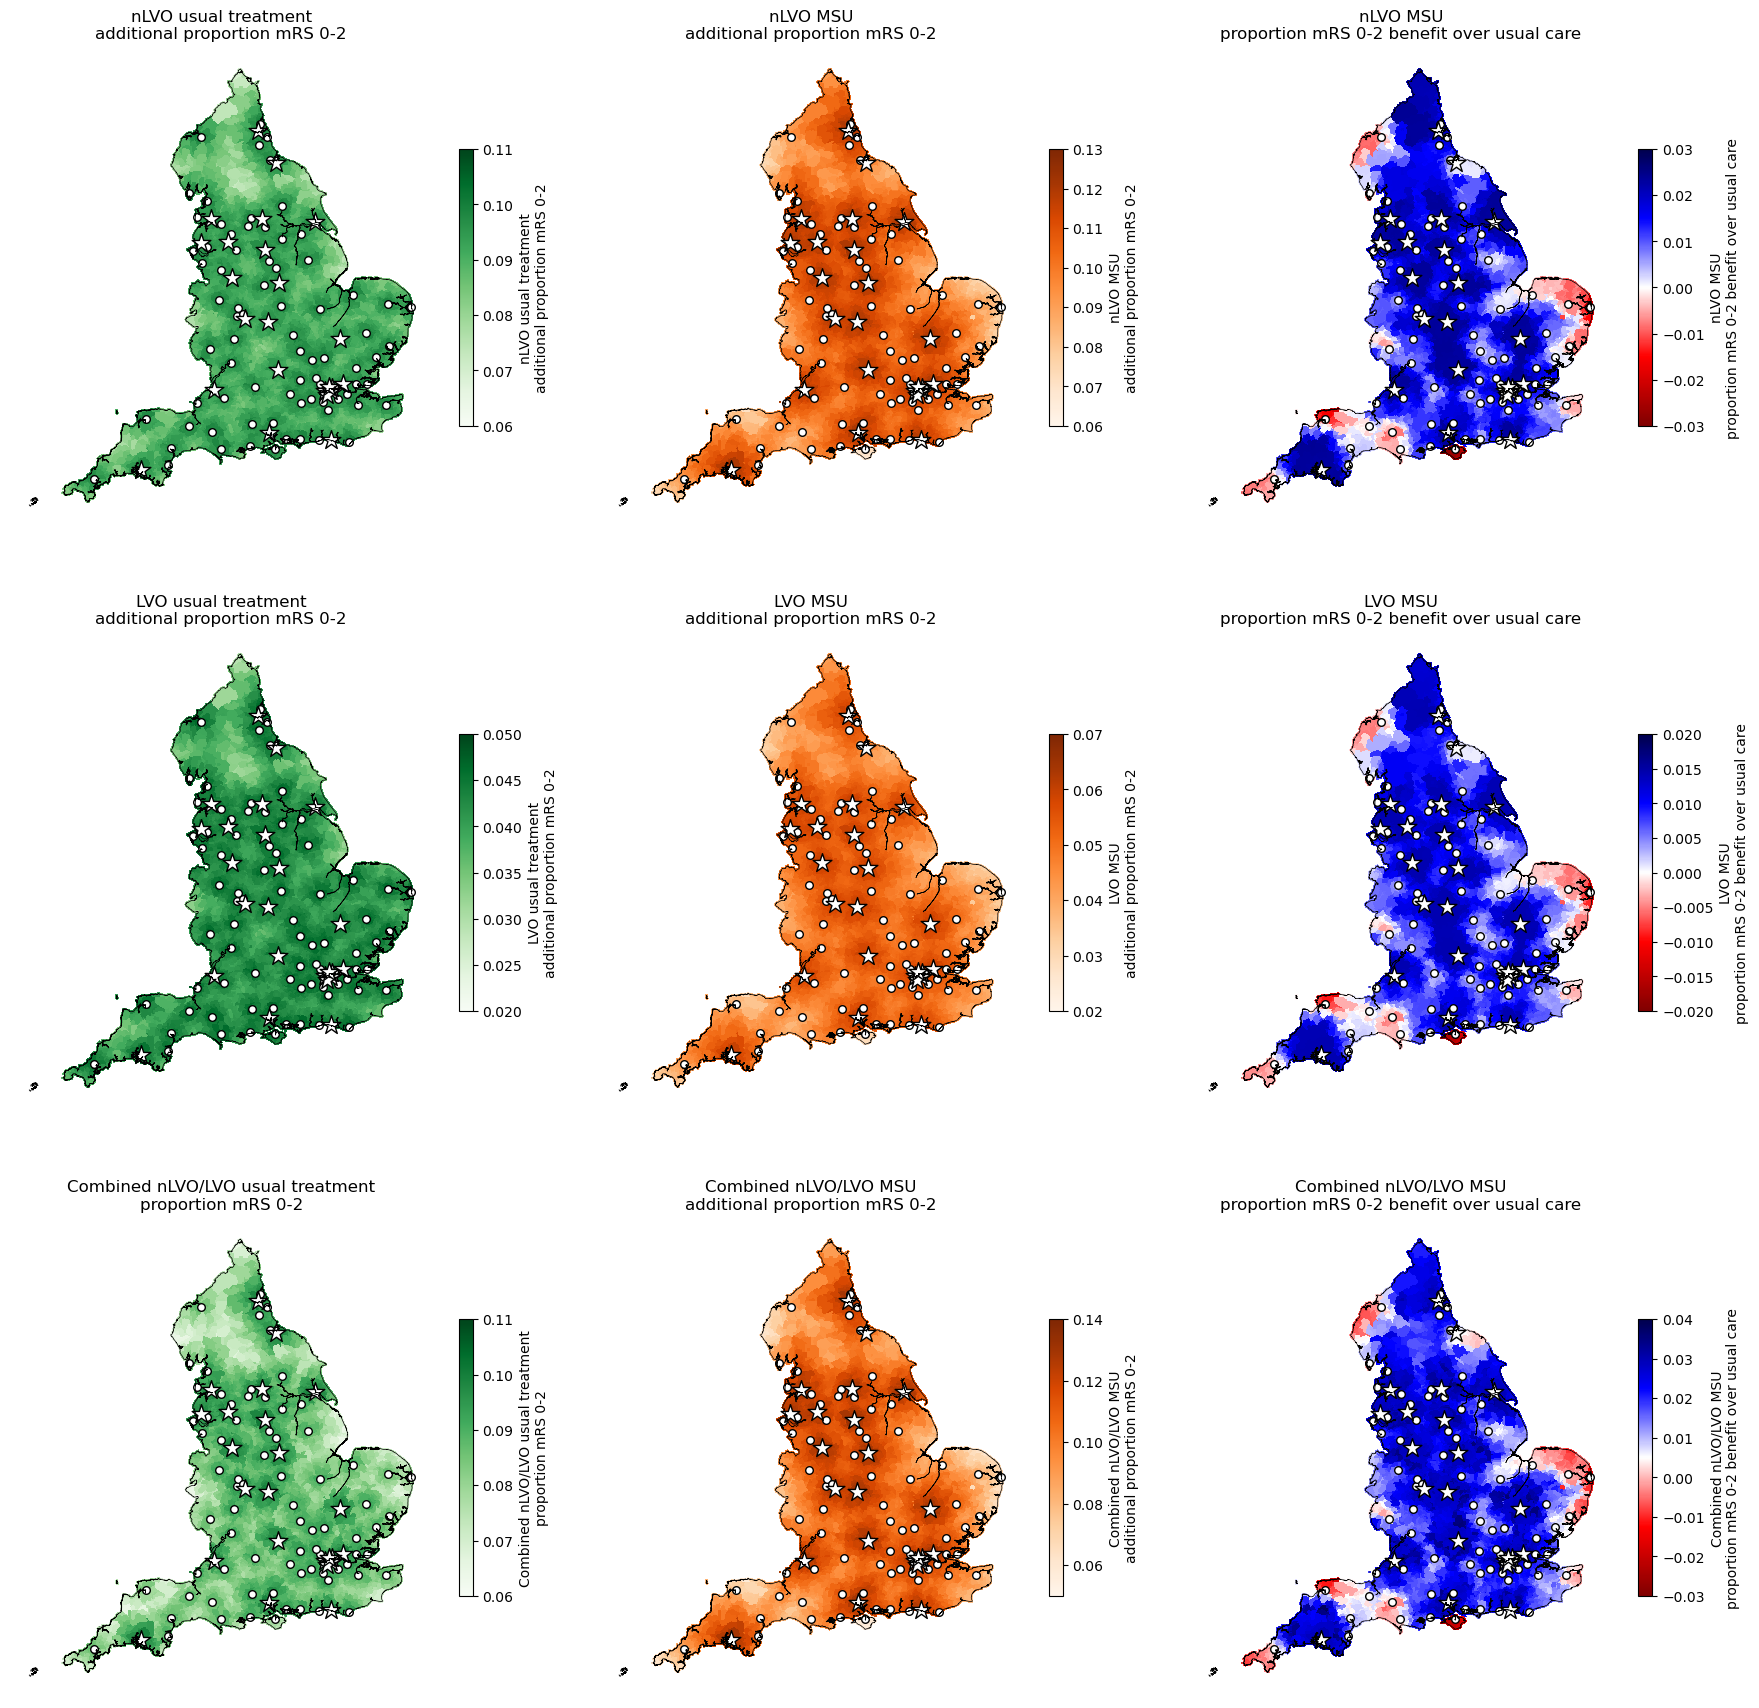

In [11]:
cols = list(cols_to_plot.keys())

fig = plt.figure(figsize=(18,18))

for i, col in enumerate(cols):
    # Get min and max of data[col]
    vmin = data[col].min()
    vmax = data[col].max()
    colormap = colormaps[col]
    if colormap == 'bwr_r':
        # Set min and max to be symmetric around 0
        vmax = max([abs(vmin), abs(vmax)])
        vmin = -vmax
    vmin = round(vmin - 0.00499, 2)
    vmax = round(vmax + 0.00499, 2)


    ax = fig.add_subplot(3, 3, i+1)

    data.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 vmin=vmin, # Manual scale min (remove to make automatic)
                 vmax=vmax, # Manual scale max (remove to make automatic)
                 cmap=colormap, # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':cols_to_plot[col]},
                 # Set to display legend
                 legend=True,
                 # Make slightly transparent
                 alpha=1.0)
    # Plot outline
    england.plot(ax=ax, edgecolor='k', facecolor='none', linewidth=0.5)    
    # Plot location of hospitals
    mask = hospitals_gdf['Use_IVT'] == '1'
    hospitals_gdf[mask].plot(ax=ax, edgecolor='k', facecolor='w', markersize=30, marker='o')
    mask = hospitals_gdf['Use_MT'] == '1'
    hospitals_gdf[mask].plot(ax=ax, edgecolor='k', facecolor='w', markersize=200, marker='*')
    ax.set_axis_off() # Turn of axis linea dn numbers
    ax.set_title(cols_to_plot[col])
plt.tight_layout(pad=2)
plt.savefig('map_mrs_0_2.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1) # Save figure


In [12]:
cols_to_plot = {
    'nlvo_drip_ship_ivt_utility_shift':'nLVO usual treatment\nadditional utility',
    'nlvo_msu_ivt_utility_shift':'nLVO MSU\nadditional utility',
    'nlvo_msu_ivt_utility_benefit': 'nLVO MSU\nutility benefit over usual care',
    'lvo_drip_ship_ivt_utility_shift':'LVO usual treatment\nadditional utility',
    'lvo_msu_ivt_mt_utility_shift':'LVO MSU\nadditional utility',
    'lvo_msu_ivt_mt_utility_benefit': 'LVO MSU\nutility benefit over usual care',
    'drip_ship_utility_shift': 'Combined nLVO/LVO usual treatment\nadditional utility',
    'msu_utility_shift': 'Combined LVO/LVO MSU\nadditional utility',
    'msu_net_utility_benefit': 'Combined LVO/LVO MSU\nutility benefit over usual care',
}

colormaps = {
    'nlvo_drip_ship_ivt_utility_shift':'Greens',
    'nlvo_msu_ivt_utility_shift':'Oranges',
    'nlvo_msu_ivt_utility_benefit': 'seismic_r',
    'lvo_drip_ship_ivt_utility_shift':'Greens',
    'lvo_msu_ivt_mt_utility_shift':'Oranges',
    'lvo_msu_ivt_mt_utility_benefit': 'seismic_r',
    'drip_ship_utility_shift': 'Greens',
    'msu_utility_shift': 'Oranges',
    'msu_net_utility_benefit': 'seismic_r',
}


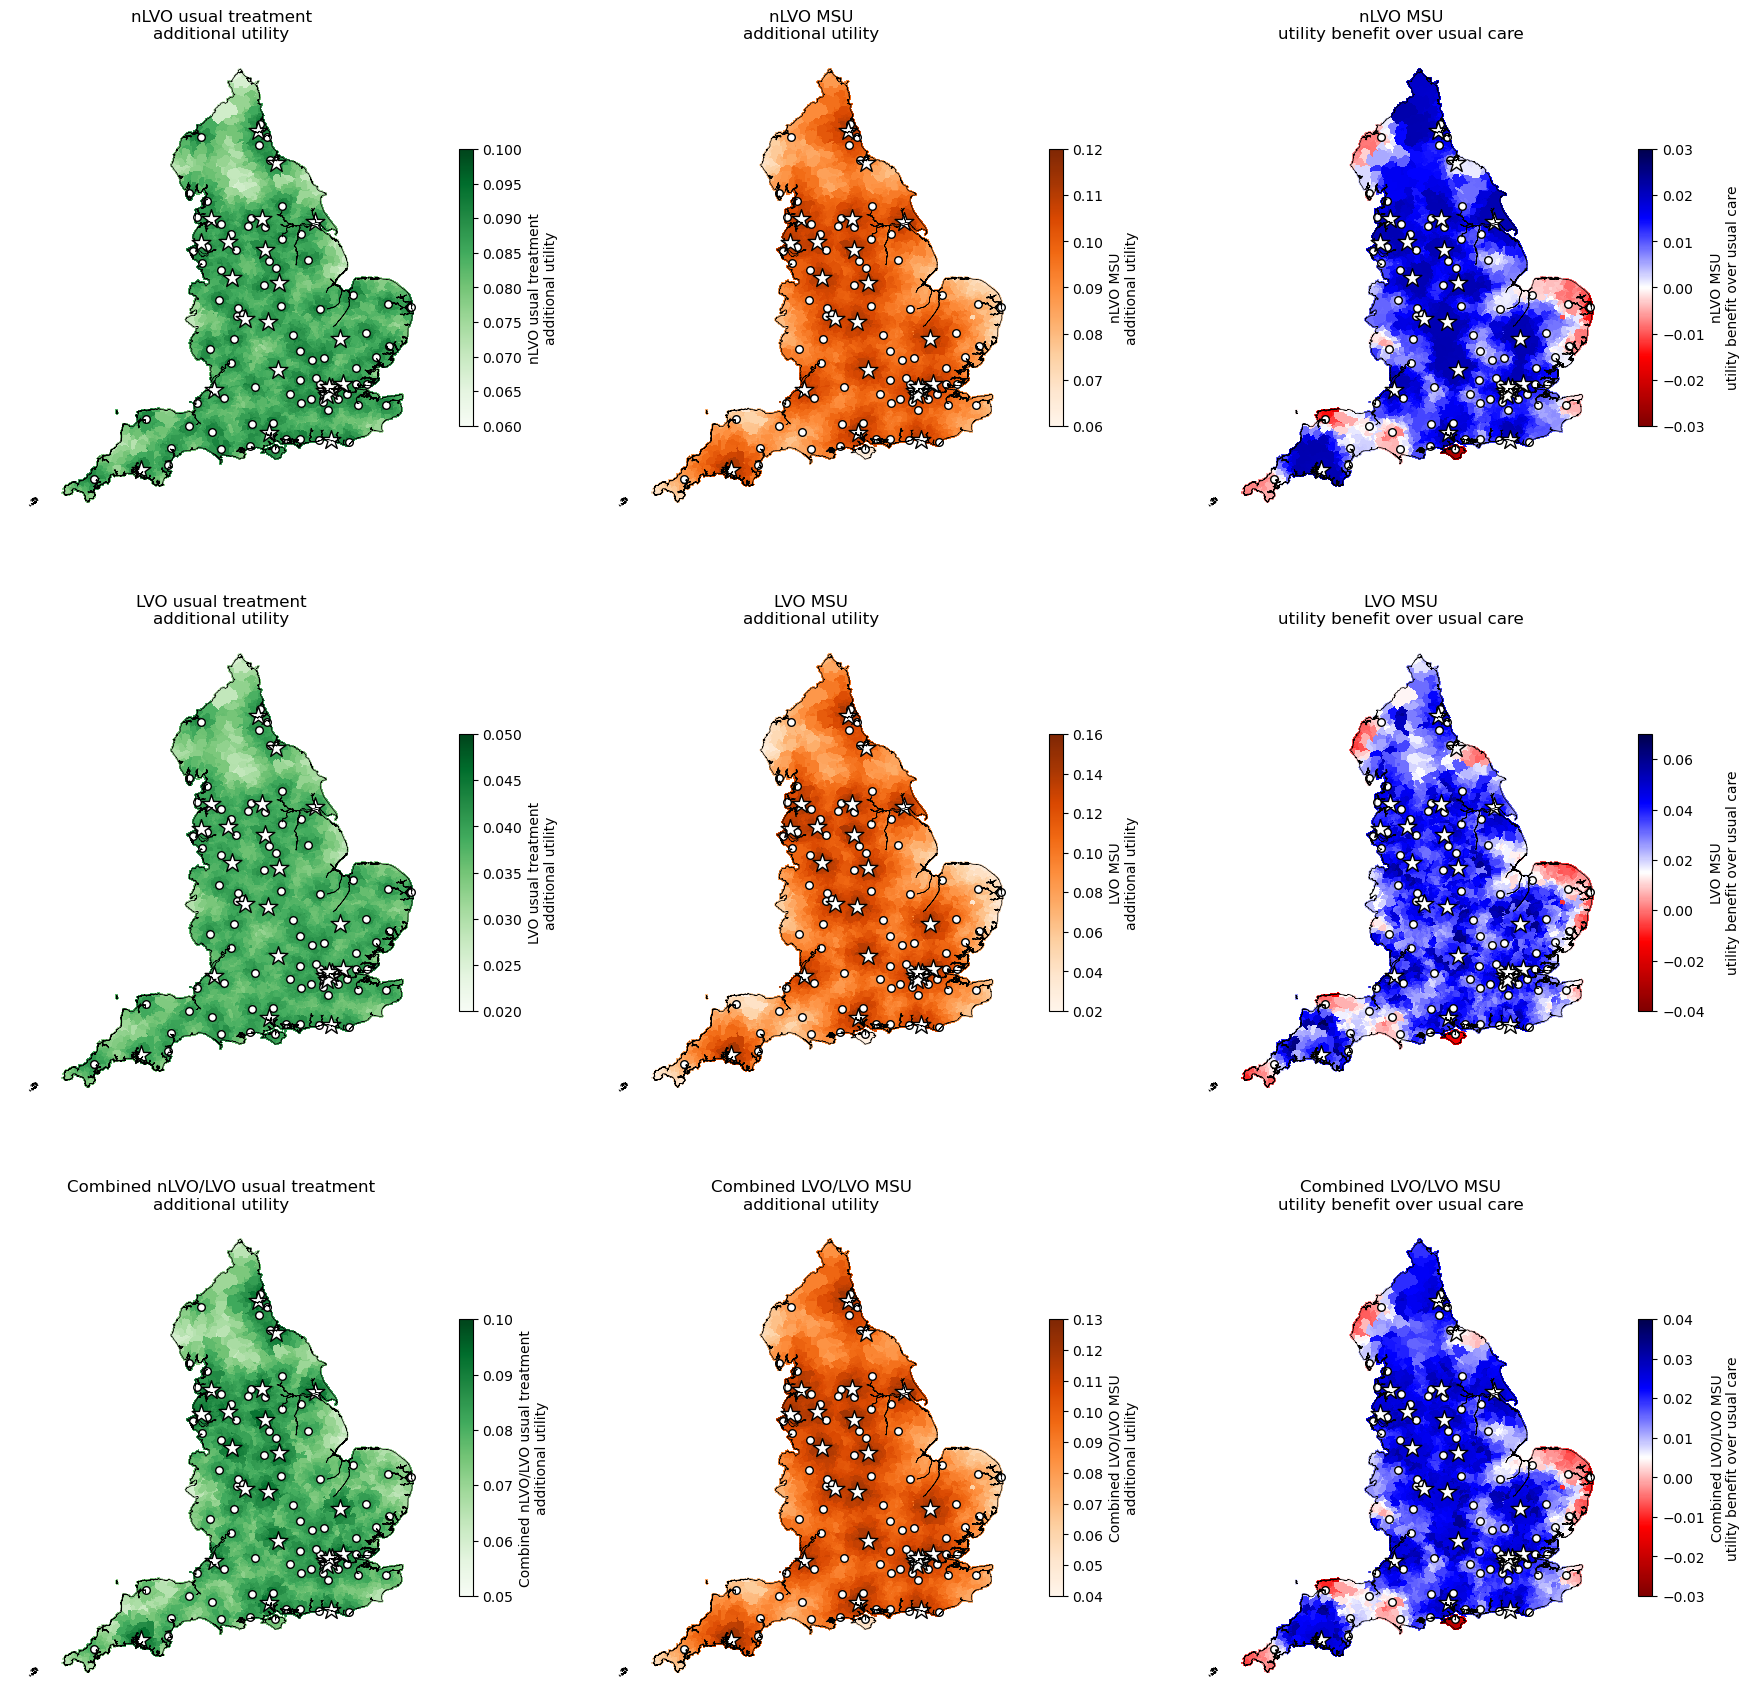

In [13]:
cols = list(cols_to_plot.keys())

fig = plt.figure(figsize=(18,18))

for i, col in enumerate(cols):
    # Get min and max of data[col]
    vmin = data[col].min()
    vmax = data[col].max()
    colormap = colormaps[col]
    if colormap == 'bwr_r':
        # Set min and max to be symmetric around 0
        vmax = max([abs(vmin), abs(vmax)])
        vmin = -vmax
    vmin = round(vmin - 0.00499, 2)
    vmax = round(vmax + 0.00499, 2)

    ax = fig.add_subplot(3, 3, i+1)

    data.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 vmin=vmin, # Manual scale min (remove to make automatic)
                 vmax=vmax, # Manual scale max (remove to make automatic)
                 cmap=colormap, # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':cols_to_plot[col]},
                 # Set to display legend
                 legend=True,
                 # Make slightly transparent
                 alpha=1.0)
    # Plot outline
    england.plot(ax=ax, edgecolor='k', facecolor='none', linewidth=0.5)    
    # Plot location of hospitals
    mask = hospitals_gdf['Use_IVT'] == '1'
    hospitals_gdf[mask].plot(ax=ax, edgecolor='k', facecolor='w', markersize=30, marker='o')
    mask = hospitals_gdf['Use_MT'] == '1'
    hospitals_gdf[mask].plot(ax=ax, edgecolor='k', facecolor='w', markersize=200, marker='*')
    ax.set_axis_off() # Turn of axis linea dn numbers
    ax.set_title(cols_to_plot[col])
plt.tight_layout(pad=2)
plt.savefig('map_utility.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1) # Save figure



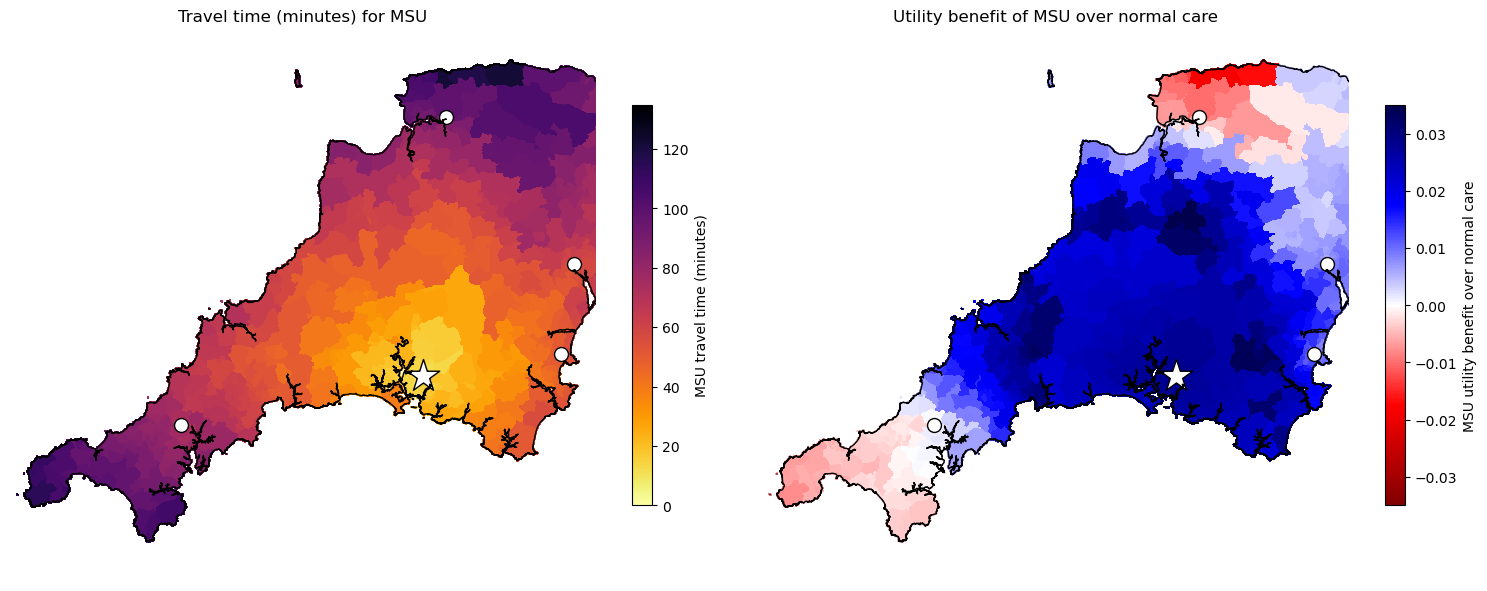

In [14]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 2, 1)
data.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column='nearest_msu_time', # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 #vmax = 0.04, # Manual scale min (remove to make automatic)
                 vmin =0, # Manual scale max (remove to make automatic)
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':'MSU travel time (minutes)'},
                 # Set to display legend
                 legend=True,
                 # Make slightly transparent
                 alpha=1)

# Plot outline
england.plot(ax=ax, edgecolor='k', facecolor='none', linewidth=1)

# Plot location of hospitals
mask = hospitals_gdf['Use_IVT'] == '1'
hospitals_gdf[mask].plot(ax=ax, edgecolor='k', facecolor='w', markersize=100, marker='o')
mask = hospitals_gdf['Use_MT'] == '1'
hospitals_gdf[mask].plot(ax=ax, edgecolor='k', facecolor='w', markersize=600, marker='*')
ax.set_axis_off() # Turn of axis line numbers

# Restric map to x = 10000 to 300000, y = 0 to 150000
ax.set_xlim(130000, 300000)
ax.set_ylim(0, 160000)
ax.set_axis_off() # Turn of axis linea dn numbers
ax.set_title('Travel time (minutes) for MSU')



ax = fig.add_subplot(1, 2, 2)
data.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column='msu_net_utility_benefit', # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 vmax = 0.035, # Manual scale min (remove to make automatic)
                 vmin = -0.035, # Manual scale max (remove to make automatic)
                 cmap='seismic_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':'MSU utility benefit over normal care'},
                 # Set to display legend
                 legend=True,
                 # Make slightly transparent
                 alpha=1)

# Plot outline
england.plot(ax=ax, edgecolor='k', facecolor='none', linewidth=1)

# Plot location of hospitals
mask = hospitals_gdf['Use_IVT'] == '1'
hospitals_gdf[mask].plot(ax=ax, edgecolor='k', facecolor='w', markersize=100, marker='o')
mask = hospitals_gdf['Use_MT'] == '1'
hospitals_gdf[mask].plot(ax=ax, edgecolor='k', facecolor='w', markersize=600, marker='*')
ax.set_axis_off() # Turn of axis line numbers


# Restric map to x = 10000 to 300000, y = 0 to 150000
ax.set_xlim(130000, 300000)
ax.set_ylim(0, 160000)
ax.set_axis_off() # Turn of axis linea dn numbers
ax.set_title('Utility benefit of MSU over normal care')

# Adjust for printing
ax.margins(0)
ax.apply_aspect()

plt.tight_layout(pad=2)
plt.subplots_adjust(left=0.01, right=1.0, bottom=0.0, top=1.0)

plt.savefig('map_zoom.jpg', dpi=300) # Save figure
plt.show()